In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import imageio

import glob
sns.set(palette='colorblind')

matplotlib.rcParams['figure.figsize'] = (15, 9)

In [2]:
ims = list()
for image_path in glob.glob("..\\Data\\Time_slices_no_green\\*.png"):
    im = imageio.imread(image_path)
    ims.append(im)

In [3]:
np.shape(ims)

(20, 2160, 3840, 4)

In [4]:
ims = np.array(ims)

In [5]:
np.unique(ims[:,:,:,3])

array([255], dtype=uint8)

In [6]:
ims = ims[:,:,:,0:3]

In [7]:
from skimage import feature

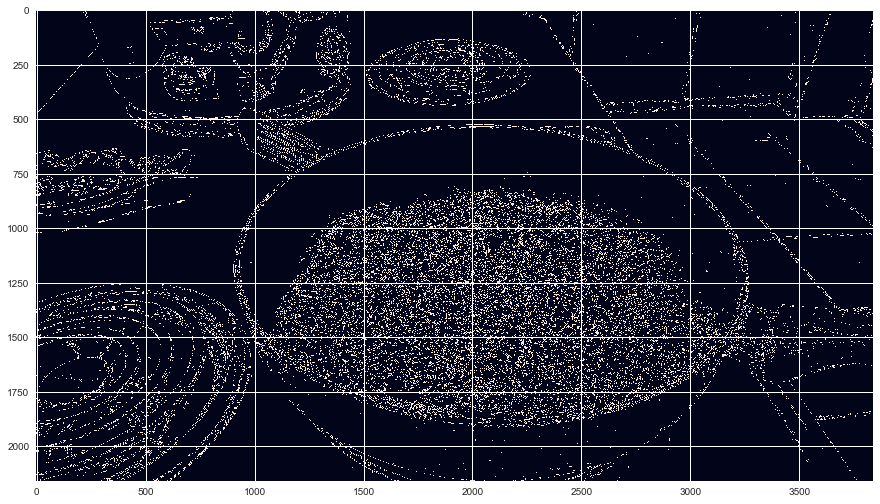

In [18]:
plt.imshow(feature.canny(ims[0,:,:,0],sigma= .01))

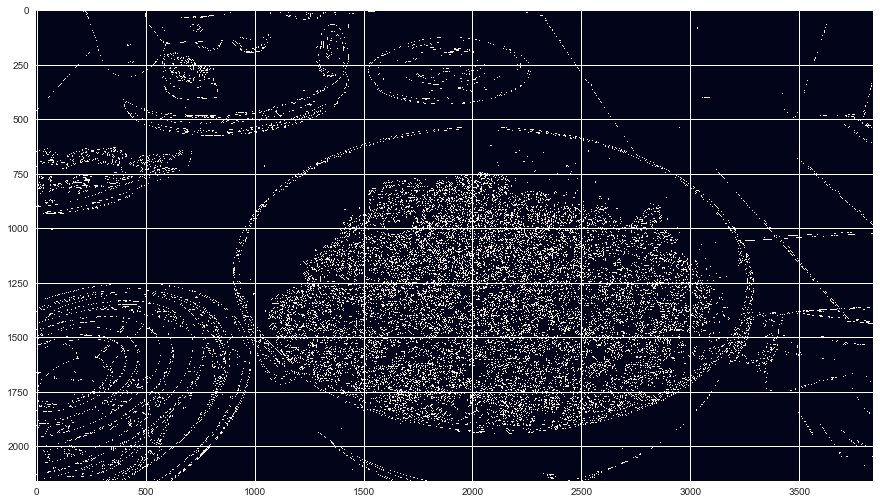

In [23]:
im_test = feature.canny(ims[19,:,:,0],sigma= .01)
plt.imshow(im_test)

In [21]:
from skimage import morphology

In [55]:
im_l = morphology.label(morphology.binary_erosion(morphology.remove_small_holes(morphology.binary_dilation(morphology.binary_dilation(im_test)),min_size=1000)))
np.unique(im_l, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

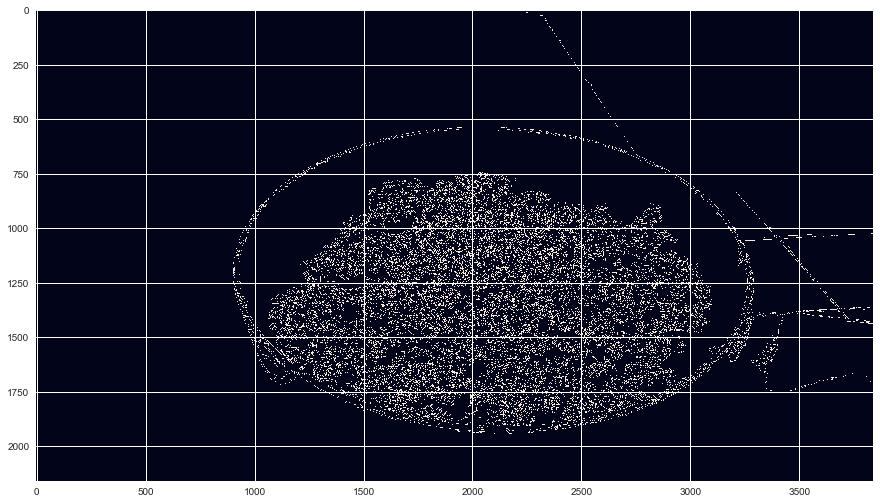

In [62]:
im_test2 = np.copy(im_test)
im_test2[im_l != 9]= 0
plt.imshow(im_test2)

In [63]:
from scipy import ndimage

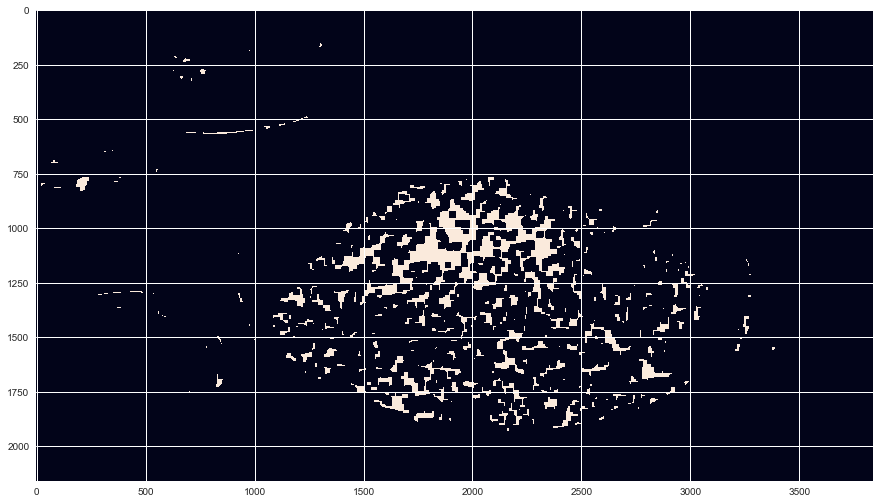

In [106]:
a = np.zeros((3,10))
b = np.zeros((10,3))
a[1,:] = 1
b[:,1] = 1
im_de = ndimage.binary_erosion(ndimage.binary_erosion(ndimage.binary_dilation(im_test,iterations=5),structure=a,iterations=3),structure=b,iterations=3)
plt.imshow(im_de)

In [109]:
ndimage.center_of_mass(im_de)

(1286.5177864310517, 1991.2672412089107)

In [110]:
plt.imshow(morphology.convex_hull_object(im_de))

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

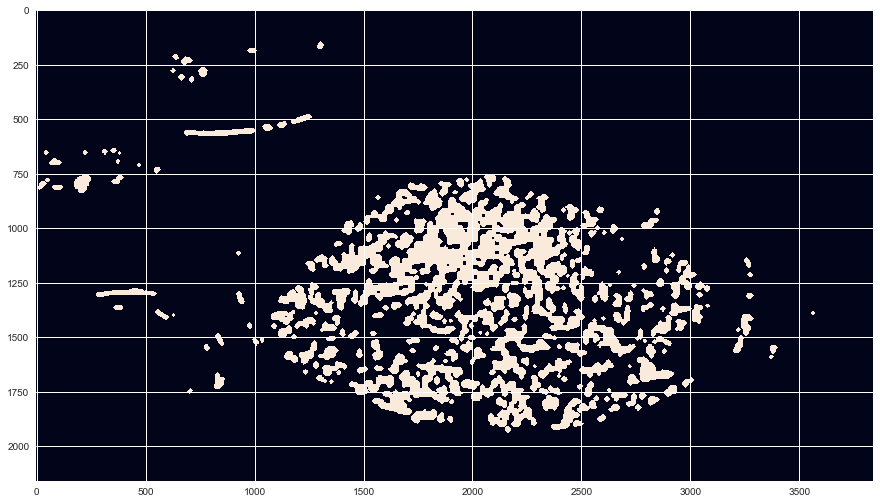

In [115]:
plt.imshow(ndimage.binary_dilation(im_de,iterations=10))

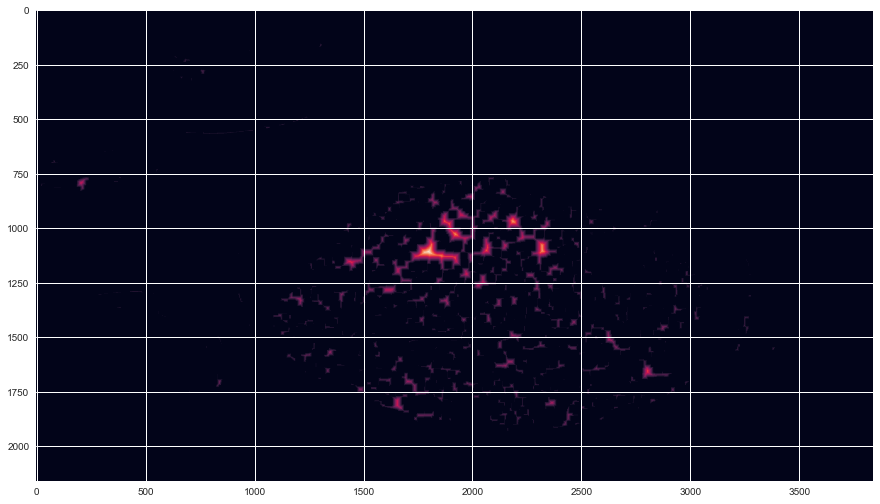

In [116]:
plt.imshow(ndimage.distance_transform_bf(im_de))

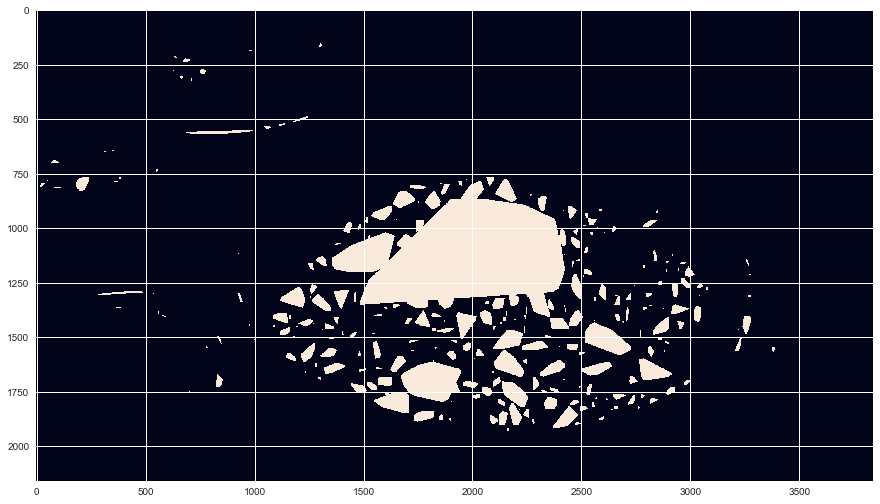

In [117]:
plt.imshow(morphology.convex_hull_object(im_de))